<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Introduction à la Régression Linéaire Simple

Dans cet exemple très simple, nous allons explorer comment créer une droite d'ajustement très simple (le cas classique de y = mx + b). Nous allons passer en revue chaque étape avec soin, afin que vous puissiez voir à quel type de question une ligne droite d'ajustement simple peut répondre. Gardez à l'esprit que ce cas est très simplifié et n'est pas l'approche que nous adopterons plus tard, c'est juste là pour vous faire réfléchir à la régression linéaire de la même manière que [Galton](https://en.wikipedia.org/wiki/Francis_Galton) l'a fait.

## Importations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Échantillons de données


Ces exemples de données proviennent du livre l'ISLR. Il affiche les ventes (en milliers d'unités) pour un produit particulier en fonction des budgets publicitaires (en milliers de dollars) pour la télévision, la radio et les journaux.

In [4]:
df = pd.read_csv("Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Y a-t-il un lien entre *le total* des dépenses publicitaires et les *ventes* (sales) ?**

In [6]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

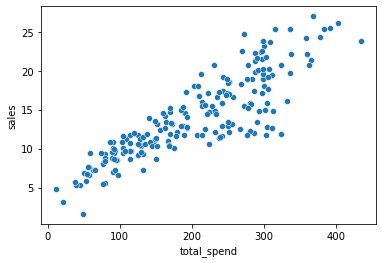

In [7]:
sns.scatterplot(x='total_spend',y='sales',data=df);

## Droite des Moindres Carrés

Disponibles sur Wikipedia : https://en.wikipedia.org/wiki/Linear_regression, ainsi qu'en lecture avec le livre ISLR.

Version en français : https://fr.wikipedia.org/wiki/Régression_linéaire

**Comprendre à quoi répond la ligne droite de meilleure ajustement.**

Si quelqu'un devait dépenser 200$ au total, quelles seraient les ventes attendues ? Nous avons beaucoup simplifié cela en combinant toutes les features en "total_spend" (dépenses totales), mais nous reviendrons plus tard sur les features individuelles. Pour l'instant, concentrons-nous sur la compréhension de ce qu'une droite de régression linéaire peut nous aider à répondre.



**Notre prochaine campagne publicitaire aura des dépenses totales de 200 $, combien d'unités devrions-nous vendre à la suite de cette campagne ?**

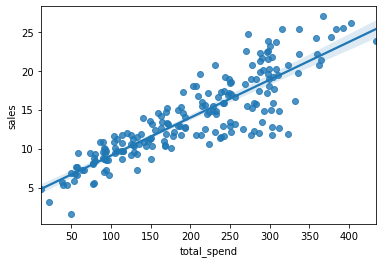

In [8]:
# En gros, nous voulons savoir comment créer cette droite
sns.regplot(x='total_spend',y='sales',data=df);

Continuons et commençons à résoudre : $$y=mx+b$$

Il suffit de résoudre pour m et b, en se rappelant que, comme indiqué dans la vidéo, nous résolvons sous une forme généralisée :

$$ \hat{y} = \beta_0 + \beta_1X$$

Avec une majuscule pour signaler que nous avons affaire à une matrice de valeurs, nous avons une matrice connue de labels / étiquettes (nombres de vente / sales) Y et une matrice connue de total_spend / dépenses totales (X). Nous allons résoudre les coefficients *bêta*, qui, à mesure que nous nous étendons à plus d'une feature / caractéristique, seront importants pour comprendre quelles features ont le plus grand pouvoir prédictif. Nous utilisons y chapeau pour indiquer que y chapeau est une prédiction ou une estimation, y serait une étiquette (label) Vraie ou une valeur connue.

Nous pouvons utiliser NumPy pour cela (si vous le souhaitez vraiment, vous pouvez résoudre ce problème [à la main](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf))

In [9]:
X = df['total_spend']
y = df['sales']

In [10]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [11]:
# Renvoie d'abord le coef d'ordre le plus élevé !
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [12]:
# Budgets potentiels de dépenses futures
potential_spend = np.linspace(0,500,100)

In [13]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

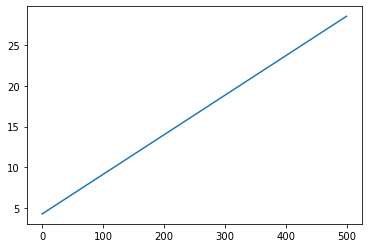

In [14]:
plt.plot(potential_spend,predicted_sales);

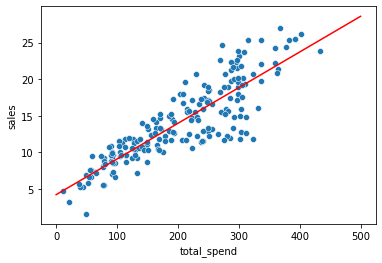

In [15]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red');

**Notre prochaine campagne publicitaire aura un coût total de 200 $, combien d'unités espérons-nous vendre grâce à cette campagne ?**

In [16]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [17]:
predicted_sales

13.98060422

# D'autres considérations... que nous allons explorer de manière beaucoup plus approfondie !

## Overfitting, Underfitting et Mesures de Performance

Remarquez que nous nous ajustons à l'ordre = 1, essentiellement une ligne droite, nous pouvons commencer à explorer des ordres plus élevés, mais un ordre plus élevé signifie-t-il un meilleur ajustement global ? Est-il possible de trop s'ajuster ? Ou trop peu ? Comment le savoir et comment définir un bon ajustement ?

In [18]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [19]:
# Budgets potentiels de dépenses futures
potential_spend = np.linspace(0,500,100)

In [20]:
predicted_sales = 3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

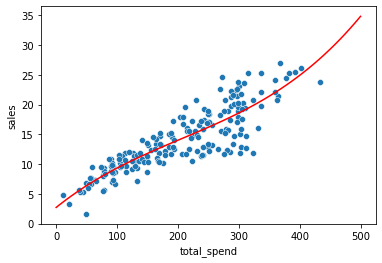

In [21]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red');

**Est-ce mieux que notre ligne droite d'ajustement ? Quels sont les bons moyens de mesurer ce résultat ?**

## Multiple Features

Les données réelles avaient 3 features, pas tout dans les dépenses totales (total_spend), cela nous permettrait de répéter le processus et peut-être d'obtenir un résultat plus précis ?

In [22]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [23]:
# Notez qu'ici nous passons 3, ce qui correspond à 3 features uniques, donc nous ne sommes pas encore polynomiaux.
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

**Uh oh ! Polyfit ne fonctionne qu'avec un tableau X en 1D ! Il va falloir passer à une bibliothèque plus puissante...**